In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sweetviz as sw
import seaborn as sns
sns.set()

In [137]:
data=pd.read_csv('Placement.csv')
data=data.drop(['sl_no','status'],axis=1)
mean=data['salary'].mean()
data['salary'].fillna(mean,inplace=True)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.000000


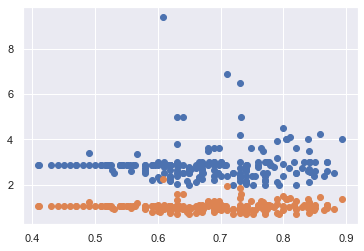

In [138]:
plt.scatter((data['ssc_p']/100.),(data['salary']/1e5))
plt.scatter((data['ssc_p']/100.),np.log(data['salary']/1e5))

In [139]:
num_columns=[ 'ssc_p', 'hsc_p', 'degree_p',
       'etest_p', 'mba_p']
cat_columns=['gender', 'ssc_b', 'hsc_b','Arts', 'Commerce', 'Comm&Mgmt', 'Sci&Tech', 'workex', 'specialisation']

In [140]:
data['salary']=data['salary'].apply(lambda x: np.log(x/1e5))
data[num_columns]=data[num_columns].apply(lambda x: x/100.)

In [141]:
data['gender']=data['gender'].map({'M':0,'F':1})
data['ssc_b']=data['ssc_b'].map({'Others':0,'Central':1})
data['hsc_b']=data['hsc_b'].map({'Others':0,'Central':1})
data['workex']=data['workex'].map({'Yes':0,'No':1})
data['specialisation']=data['specialisation'].map({'Mkt&HR':0,'Mkt&Fin':1})
dummy_1=data['hsc_s'].str.get_dummies().drop(['Science'],axis=1)
dummy_2=data['degree_t'].str.get_dummies().drop(['Others'],axis=1)
data=data.drop(['hsc_s','degree_t'],axis=1)
data=pd.concat([data,dummy_1,dummy_2],axis=1)
data=data[num_columns+cat_columns+['salary']]

In [142]:
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender,ssc_b,hsc_b,Arts,Commerce,Comm&Mgmt,Sci&Tech,workex,specialisation,salary
0,0.6700,0.9100,0.5800,0.550,0.5880,0,0,0,0,1,0,1,1,0,0.993252
1,0.7933,0.7833,0.7748,0.865,0.6628,0,1,0,0,0,0,1,0,1,0.693147
2,0.6500,0.6800,0.6400,0.750,0.5780,0,1,1,1,0,1,0,1,1,0.916291
3,0.5600,0.5200,0.5200,0.660,0.5943,0,1,1,0,0,0,1,1,0,1.060063
4,0.8580,0.7360,0.7330,0.968,0.5550,0,1,1,0,1,1,0,1,1,1.446919


In [143]:
numerical=data[num_columns]
categorical=data[cat_columns]
targets=data['salary']
mean=targets.mean()
std=targets.std()

In [144]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical=scaler.fit_transform(numerical)
targets=(targets-mean)/(std)
numerical=pd.DataFrame(data=numerical,columns=num_columns)
data=pd.concat([numerical,categorical],axis=1)
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender,ssc_b,hsc_b,Arts,Commerce,Comm&Mgmt,Sci&Tech,workex,specialisation
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,0,0,0,0,1,0,1,1,0
1,1.113369,1.103448,1.513267,1.087157,0.687620,0,1,0,0,0,0,1,0,1
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,0,1,1,1,0,1,0,1,1
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,0,1,1,0,0,0,1,1,0
4,1.712332,0.668391,0.943909,1.864806,-1.164676,0,1,1,0,1,1,0,1,1


In [180]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(data,targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
reg.intercept_

0.1310281492502748

In [182]:
from sklearn.metrics import r2_score,mean_squared_error
predictions=reg.predict(data)
print(r2_score(targets,predictions))
print(np.sqrt(mean_squared_error(targets,predictions)))
print(adjusted_r2(r2_score(targets,predictions),215,10))

0.13543888630365986
0.9276528980249196
0.0930584395538393


(-2.0, 6.0)

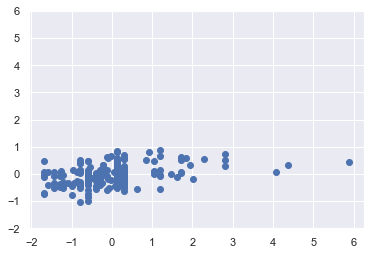

In [183]:
plt.scatter(targets,predictions)
plt.ylim(-2,6)

(array([ 2.,  5., 13., 25., 41., 53., 43.,  9., 10.,  3.,  4.,  3.,  1.,
         0.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([-2.13082907, -1.75121019, -1.37159131, -0.99197243, -0.61235354,
        -0.23273466,  0.14688422,  0.5265031 ,  0.90612198,  1.28574086,
         1.66535975,  2.04497863,  2.42459751,  2.80421639,  3.18383527,
         3.56345415,  3.94307303,  4.32269192,  4.7023108 ,  5.08192968,
         5.46154856]),
 <a list of 20 Patch objects>)

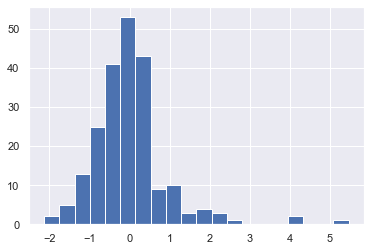

In [184]:
errors=targets-predictions
plt.hist(errors,bins=20)

In [185]:
weights=pd.DataFrame(data=reg.coef_,index=list(data.columns),columns=['Weights'])
weights

,Weights
ssc_p,-0.109602
degree_p,-0.115395
etest_p,0.134524
mba_p,0.227529
gender,-0.328867
Arts,-0.253337
Commerce,0.217403
Comm&Mgmt,-0.370830
Sci&Tech,0.159065
specialisation,0.161904


In [103]:
from sklearn.feature_selection import f_regression
fval,pval=f_regression(data,targets,center=False)
f_select=pd.DataFrame(data=[fval,pval],index=['fval','pval'],columns=list(data.columns))
f_select

,ssc_p,degree_p,etest_p,mba_p,gender,ssc_b,hsc_b,Arts,Commerce,Comm&Mgmt,Sci&Tech,workex,specialisation
fval,0.000026,0.014015,0.223435,0.181677,9.743795e+01,2.259920e+02,1.275920e+02,9.794587,2.153575e+02,3.495501e+02,8.894096e+01,3.444597e+02,2.675905e+02
pval,0.995960,0.905875,0.636917,0.670364,3.529858e-19,2.424916e-35,1.643291e-23,0.001994,3.362946e-34,6.969566e-47,7.024427e-18,1.845281e-46,1.479011e-39


In [178]:
data=data.drop(['workex'],axis=1)

In [179]:
data.head()

,ssc_p,degree_p,etest_p,mba_p,gender,Arts,Commerce,Comm&Mgmt,Sci&Tech,specialisation
0,-0.028087,-1.140102,-1.291091,-0.597647,0,0,1,0,1,0
1,1.113369,1.513267,1.087157,0.687620,0,0,0,0,1,1
2,-0.213238,-0.322843,0.218908,-0.769474,0,1,0,1,0,1
3,-1.046417,-1.957362,-0.460592,-0.489396,0,0,0,0,1,0
4,1.712332,0.943909,1.864806,-1.164676,0,0,1,1,0,1


In [56]:
def adjusted_r2(score,n,p):
    return 1-(((1-score)*(n-1))/(n-p-1))

In [104]:
targets.describe()

count    215.000000
mean       1.035776
std        0.204826
min        0.693147
25%        0.916291
50%        1.060063
75%        1.060063
max        2.240710
Name: salary, dtype: float64